In [1]:
import requests
import json
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import urllib.request

In [3]:
from urllib.request import Request, urlopen

In [4]:
from bs4 import BeautifulSoup

In [5]:
data = {}
for i in range (0,24):
    for j in range (1,15):
        if i < 9:
            URL = 'https://www.weltfussball.de/spielerliste/bundesliga-200' + str(i) + '-' + '200' + str(i+1)
            URL_ = URL + '/nach-name/'+ str(j) + '/'
            response = requests.get(URL_,headers={'User-Agent': 'Mozilla/5.0'})
            data[(i, j)] = pd.read_html(response.text)[1]
        elif i == 9:
            URL = 'https://www.weltfussball.de/spielerliste/bundesliga-200' + str(i) + '-' + '20' + str(i+1)
            URL_ = URL + '/nach-name/'+ str(j) + '/'
            response = requests.get(URL_,headers={'User-Agent': 'Mozilla/5.0'})
            data[(i, j)] = pd.read_html(response.text)[1]
        elif 9 < i < 23:
            URL = 'https://www.weltfussball.de/spielerliste/bundesliga-20' + str(i) + '-' + '20' + str(i+1)
            URL_ = URL + '/nach-name/'+ str(j) + '/'
            response = requests.get(URL_,headers={'User-Agent': 'Mozilla/5.0'})
            data[(i, j)] = pd.read_html(response.text)[1]

df = pd.concat(data).reset_index(level=2, drop=True) 

In [6]:
len(df)

12592

In [7]:
df.tail(20)

Spieler  \
22 11                        Silvan Widmer   
   11                       Patrick Wimmer   
   11                           Jonas Wind   
   11                     Frederik Winther   
   11                        Florian Wirtz   
   11                          Hannes Wolf   
   11                          Marius Wolf   
   11                    Luca Wollschläger   
   12                       Nick Woltemade   
   12                          Joscha Wosz   
   12                         Maya Yoshida   
   12                      Rodrigo Zalazar   
   12                   Deyovaisio Zeefuik   
   12                        Aaron Zehnter   
   12                        Robin Zentner   
   12                     Michael Zetterer   
   12                       Joshua Zirkzee   
   12                         Simon Zoller   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   

                                Unnamed: 1  \
22 11                                  NaN   
   11                                  NaN   
   11                                  NaN   
   11                                  NaN   
   11                                  NaN   
   11                                  NaN   
   11                                  NaN   
   11                                  NaN   
   12                                  NaN   
   12                                  NaN   
   12                                  NaN   
   12                                  NaN   
   12                                  NaN   
   12                                  NaN   
   12                                  NaN   
   12                                  NaN   
   12                                  NaN   
   12                                  NaN   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   

                                Mannschaft  \
22 11                      1. FSV Mainz 05   
   11                        VfL Wolfsburg   
   11                        VfL Wolfsburg   
   11                          FC Augsburg   
   11                     Bayer Leverkusen   
   11                 Bor. Mönchengladbach   
   11                    Borussia Dortmund   
   11                           Hertha BSC   
   12                        Werder Bremen   
   12                           RB Leipzig   
   12                        FC Schalke 04   
   12                        FC Schalke 04   
   12                           Hertha BSC   
   12                          FC Augsburg   
   12                      1. FSV Mainz 05   
   12                        Werder Bremen   
   12                       Bayern München   
   12                           VfL Bochum   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   

                                   Geboren  \
22 11                           05.03.1993   
   11                           30.05.2001   
   11                           07.02.1999   
   11                           04.01.2001   
   11                           03.05.2003   
   11                           16.04.1999   
   11                           27.05.1995   
   11                           08.02.2003   
   12                           14.02.2002   
   12                           20.07.2002   
   12                           24.08.1988   
   12                           12.08.1999   
   12                           11.03.1998   
   12                           31.10.2004   
   12                           28.10.1994   
   12                           12.07.1995   
   12                           22.05.2001   
   12                           26.06.1991   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   

                                     Größe  \
22 11                               183 cm   
   11                               182 cm   
   11                        

In [8]:
df.columns

Index(['Spieler', 'Unnamed: 1', 'Mannschaft', 'Geboren', 'Größe', 'Position'], dtype='object')

In [9]:
df = df[['Spieler', 'Mannschaft', 'Geboren', 'Größe',
       'Position']]

In [10]:
df.head()

Spieler            Mannschaft     Geboren   Größe Position
0 1  Sebastian Abt       Energie Cottbus  26.02.1981  179 cm       AB
  1      Otto Addo     Borussia Dortmund  09.06.1975  188 cm       MF
  1        Adhemar         VfB Stuttgart  27.04.1972  169 cm       ST
  1   Silvio Adzic  1. FC Kaiserslautern  23.09.1980  170 cm       ST
  1   Victor Agali         Hansa Rostock  29.12.1978  193 cm       ST

In [11]:
df[df['Geboren'].str.len() > 10]

Spieler  \
0  13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
1  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
2  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
3  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
4  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
5  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
6  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
7  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
8  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
9  13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
10 12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
11 12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
12 13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
13 13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
14 12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
15 12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
16 12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
17 13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
18 12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
19 13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
20 13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
21 13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
22 13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   

                                Mannschaft  \
0  13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
1  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
2  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
3  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
4  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
5  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
6  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
7  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten vorhanden.   
8  12  Es sind noch keine Daten vorhanden.   
   13  Es sind noch keine Daten vorhanden.   
   14  Es sind noch keine Daten 

In [12]:
df = df.loc[df['Spieler'] != 'Es sind noch keine Daten vorhanden.']

In [13]:
df['Geboren'] = pd.to_datetime(df['Geboren'],format = '%d.%m.%Y')

In [14]:
df.head()

Spieler            Mannschaft    Geboren   Größe Position
0 1  Sebastian Abt       Energie Cottbus 1981-02-26  179 cm       AB
  1      Otto Addo     Borussia Dortmund 1975-06-09  188 cm       MF
  1        Adhemar         VfB Stuttgart 1972-04-27  169 cm       ST
  1   Silvio Adzic  1. FC Kaiserslautern 1980-09-23  170 cm       ST
  1   Victor Agali         Hansa Rostock 1978-12-29  193 cm       ST

In [15]:
df['Month'] = df['Geboren'].dt.month

In [16]:
df.head()

Spieler            Mannschaft    Geboren   Größe Position  Month
0 1  Sebastian Abt       Energie Cottbus 1981-02-26  179 cm       AB      2
  1      Otto Addo     Borussia Dortmund 1975-06-09  188 cm       MF      6
  1        Adhemar         VfB Stuttgart 1972-04-27  169 cm       ST      4
  1   Silvio Adzic  1. FC Kaiserslautern 1980-09-23  170 cm       ST      9
  1   Victor Agali         Hansa Rostock 1978-12-29  193 cm       ST     12

In [17]:
len(df)

12532

In [18]:
df_month = df['Month'].value_counts()

In [19]:
df_month = df_month.to_frame()

In [20]:
df_month.reset_index(inplace=True)

In [21]:
df_month = df_month.sort_values('index')

In [22]:
df_month.columns

Index(['index', 'Month'], dtype='object')

In [23]:
df_month.columns = ['month', 'count']

In [24]:
df_month

,month,count
0,1,1419
4,2,1098
1,3,1336
3,4,1099
6,5,1024
7,6,989
8,7,922
5,8,1038
2,9,1113
10,10,862


<AxesSubplot:xlabel='month'>

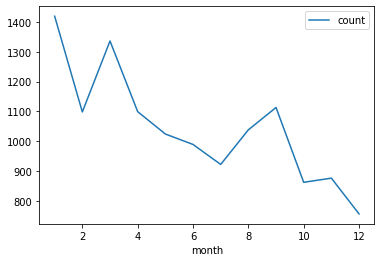

In [25]:
df_month.plot.line(x='month',y='count')

In [26]:
df.reset_index(inplace=True)

In [27]:
df.tail()

,level_0,level_1,Spieler,Mannschaft,Geboren,Größe,Position,Month
12527,22,12,Aaron Zehnter,FC Augsburg,2004-10-31,180 cm,ST,10
12528,22,12,Robin Zentner,1. FSV Mainz 05,1994-10-28,194 cm,TW,10
12529,22,12,Michael Zetterer,Werder Bremen,1995-07-12,187 cm,TW,7
12530,22,12,Joshua Zirkzee,Bayern München,2001-05-22,193 cm,ST,5
12531,22,12,Simon Zoller,VfL Bochum,1991-06-26,179 cm,ST,6


In [28]:
df = df[['level_0', 'Spieler', 'Mannschaft', 'Geboren', 'Größe',
       'Position', 'Month']]

In [29]:
df_seasons = df.pivot_table(index = 'level_0',columns='Month',aggfunc='count',values='Spieler')

In [30]:
df_seasons.describe()

Month,1,2,3,4,5,6,7,8,9,10,11,12
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,61.695652,47.739130,58.086957,47.782609,44.521739,43.000000,40.086957,45.130435,48.391304,37.478261,38.086957,32.869565
std,4.761921,8.241896,7.216856,5.728371,7.506782,5.575922,5.623918,3.876554,6.972277,8.928349,7.128133,6.077562
min,55.000000,33.000000,45.000000,39.000000,36.000000,34.000000,30.000000,38.000000,37.000000,25.000000,26.000000,23.000000
25%,59.000000,41.000000,51.500000,44.000000,39.000000,39.500000,37.000000,43.000000,44.000000,32.500000,32.500000,29.000000
50%,61.000000,50.000000,60.000000,47.000000,42.000000,42.000000,40.000000,44.000000,47.000000,36.000000,38.000000,33.000000
75%,63.000000,55.000000,62.500000,50.500000,51.500000,46.000000,44.000000,48.000000,53.000000,39.500000,43.000000,36.000000
max,74.000000,59.000000,71.000000,59.000000,61.000000,55.000000,50.000000,53.000000,63.000000,60.000000,51.000000,47.000000


In [31]:
df_seasons

Month,1,2,3,4,5,6,7,8,9,10,11,12
level_0,,,,,,,,,,,,
0,58,33,51,45,37,35,47,48,53,60,38,47
1,55,34,52,42,40,42,39,43,55,54,45,44
2,59,33,50,41,43,38,36,44,53,54,44,38
3,60,39,50,43,40,41,43,44,43,46,40,35
4,59,40,45,40,37,41,49,47,47,37,49,38
5,60,40,49,39,36,41,45,48,48,37,47,31
6,65,47,45,44,46,41,38,53,44,35,48,26
7,63,50,58,46,55,42,39,41,47,30,40,34
8,59,42,60,48,48,40,41,45,45,35,36,40


In [32]:
df_s = df_seasons.T

In [33]:
df_s.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64', name='level_0')

In [34]:
import matplotlib.pyplot as plt

In [35]:
df_seasons.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

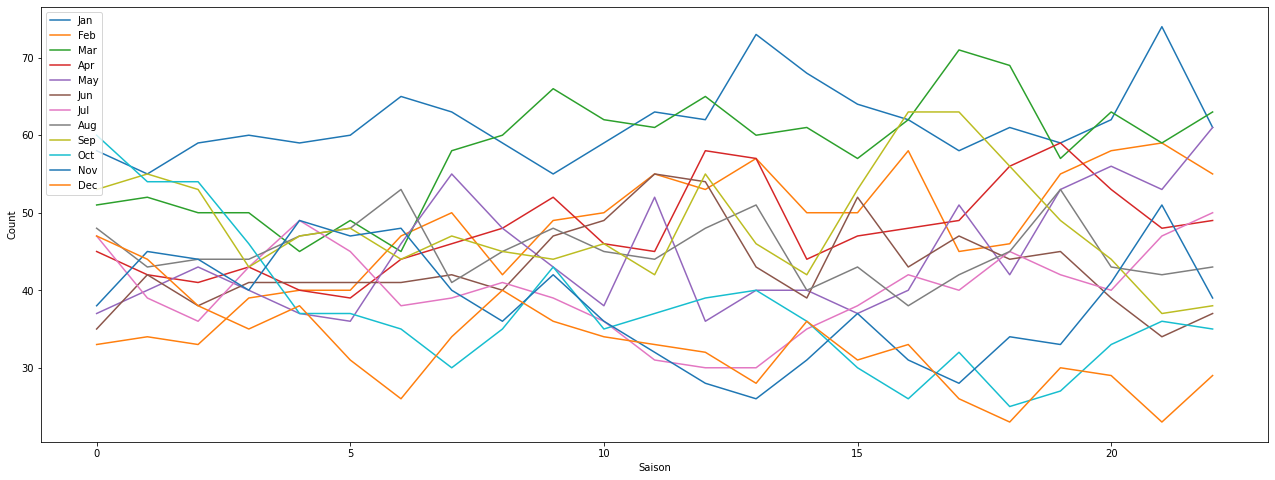

In [36]:
plt.figure(figsize=(22,8))
plt.xlabel('Saison')
plt.ylabel('Count')
#plt.gca().set_prop_cycle(color=['green','blue','orange','red','c','orange',])
plt.plot(df_seasons[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]])
plt.legend(['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

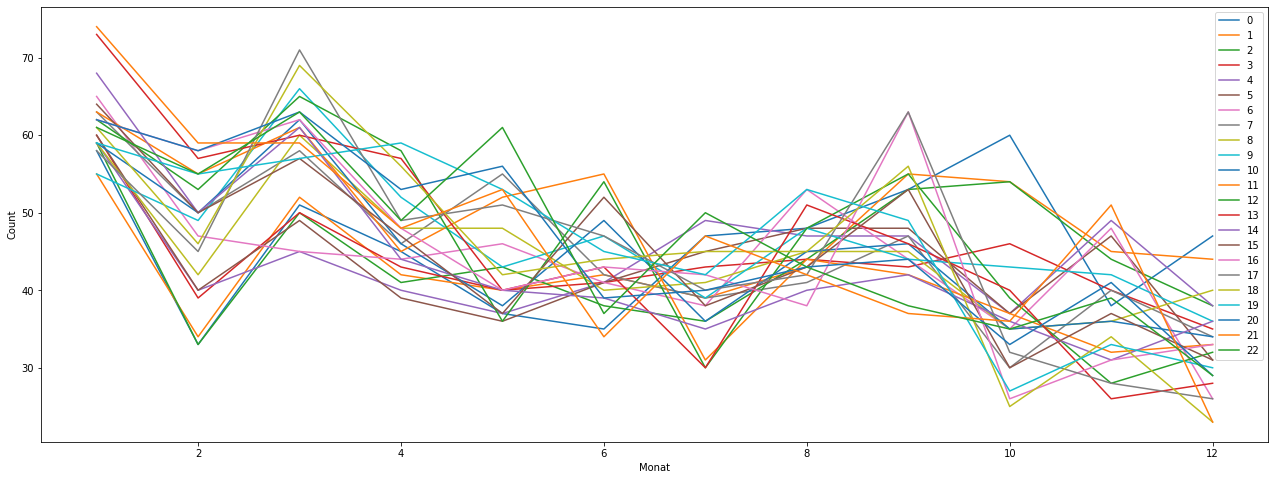

In [37]:
plt.figure(figsize=(22,8))
plt.xlabel('Monat')
plt.ylabel('Count')
#plt.gca().set_prop_cycle(color=['green','blue','orange','red','c','orange',])
plt.plot(df_s[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22]])
plt.legend([0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22])

In [40]:
df_seasons.head(20)

Month,1,2,3,4,5,6,7,8,9,10,11,12
level_0,,,,,,,,,,,,
0,58,33,51,45,37,35,47,48,53,60,38,47
1,55,34,52,42,40,42,39,43,55,54,45,44
2,59,33,50,41,43,38,36,44,53,54,44,38
3,60,39,50,43,40,41,43,44,43,46,40,35
4,59,40,45,40,37,41,49,47,47,37,49,38
5,60,40,49,39,36,41,45,48,48,37,47,31
6,65,47,45,44,46,41,38,53,44,35,48,26
7,63,50,58,46,55,42,39,41,47,30,40,34
8,59,42,60,48,48,40,41,45,45,35,36,40


<AxesSubplot:>

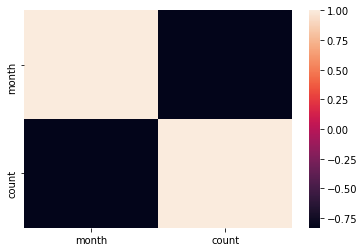

In [41]:
import seaborn as sns
corr = df_month.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

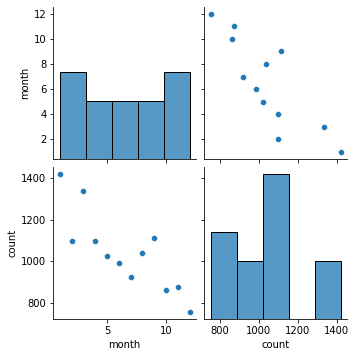

In [44]:
sns.pairplot(df_month)

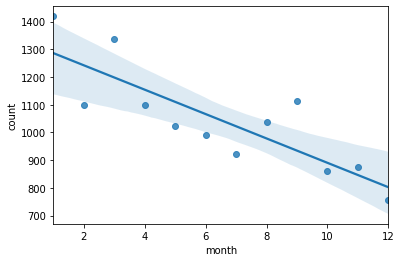

In [45]:
ax = sns.regplot(x="month", y="count", data=df_month)